In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from metadata.const import features, dtypes, class_label

In [2]:
df = pd.read_csv('dataset/clean-sample-200000.csv', dtype=dtypes)
df = shuffle(df)

In [3]:
X = df.drop(class_label, axis=1)
y = df[class_label]

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [6]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred = gnb.predict(X_test)

In [8]:
score = gnb.score(X_test, y_test)
print(score)

0.9732012063765618


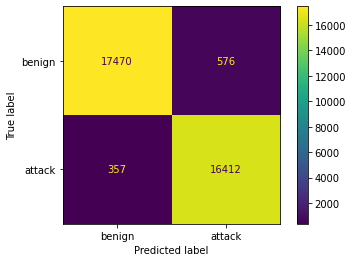

In [9]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign', 'attack'])
cmd.plot()

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     18046
         1.0       0.97      0.98      0.97     16769

    accuracy                           0.97     34815
   macro avg       0.97      0.97      0.97     34815
weighted avg       0.97      0.97      0.97     34815

